In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [131]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data.index = list(range(data.shape[0]))
real_data = data.copy()
data = data.iloc[:800]
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
1,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
3,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
4,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,34.750000,50.070000,44.480000,28.400000,39.110001,26.480000,17.280001,48.290001,37.950001,52.320000,...,73.720001,47.509998,40.020000,30.680000,72.190002,30.020000,95.360001,16.209999,76.489998,32.060001
796,34.509998,50.139999,44.349998,28.370001,38.700001,26.900000,17.379999,48.130001,37.849998,51.799999,...,73.019997,46.900002,40.270000,30.610001,71.750000,30.070000,94.150002,16.020000,75.669998,32.099998
797,34.459999,50.009998,44.810001,27.950001,39.360001,27.090000,17.270000,47.380001,37.389999,50.580002,...,72.419998,47.869999,40.279999,30.450001,71.970001,30.080000,94.360001,16.100000,75.669998,32.299999
798,34.450001,49.720001,44.509998,28.330000,39.430000,27.200001,17.250000,48.360001,36.849998,52.840000,...,72.570000,48.160000,39.970001,30.459999,72.260002,29.969999,92.690002,16.290001,75.279999,31.809999


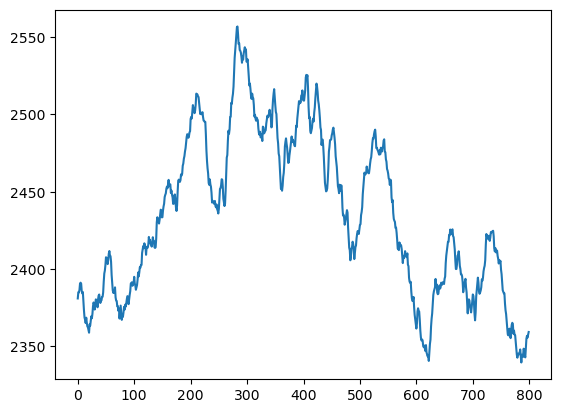

In [137]:
plt.plot(data.sum(axis=1))

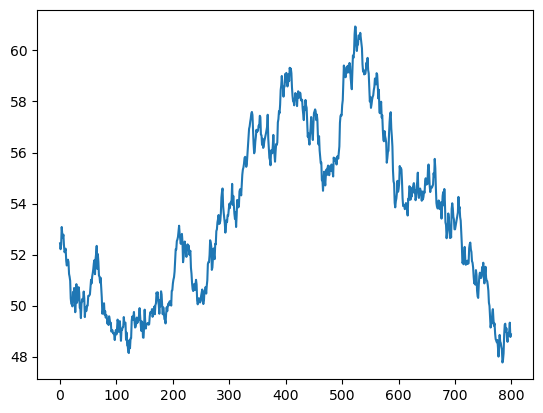

In [139]:
plt.plot(data[13])

In [123]:
def linear_lead_lag(t1: pd.Series, t2: pd.Series, specific_lags: list = None):
    """
    Calculate lead-lag relationship between two time series.
    """
    results = []
    for lag in specific_lags:
        t1_lagged = t1.shift(lag).dropna()
        if lag < 0:
            t2_lagged = t2.iloc[:len(t1_lagged)]
        else:
            t2_lagged = t2.iloc[-len(t1_lagged):]

        # print(t1_lagged)
        # print(t2_lagged)
        
        correlation = np.corrcoef(t1_lagged.dropna(), t2_lagged.dropna())[0, 1]
        results.append(abs(correlation))
    plt.scatter(specific_lags, results, color='blue')
    plt.title('Lead-Lag Correlation')
    plt.xlabel('Lag (seconds)')
    plt.ylabel('Correlation')
    plt.show()
    return (specific_lags, results)    

In [124]:
total = data.sum(axis=1).pct_change().dropna()
total.shift(1).dropna()

2      0.001693
3     -0.000067
4      0.000688
5      0.001735
6      0.000230
         ...   
795    0.002497
796    0.002674
797    0.000764
798   -0.000479
799    0.000815
Length: 798, dtype: float32

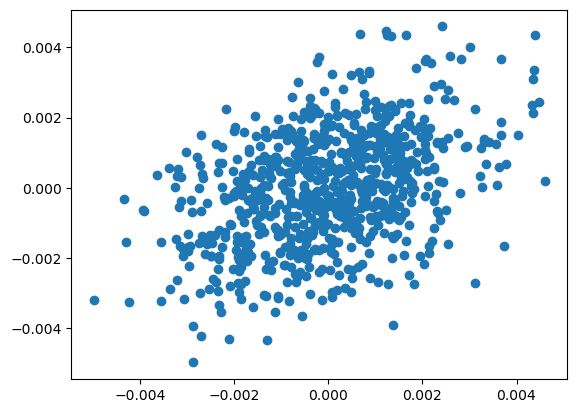

In [125]:
total = data.sum(axis=1).pct_change().dropna()
plt.plot(total.iloc[1:].dropna(), total.shift(1).dropna(), 'o')

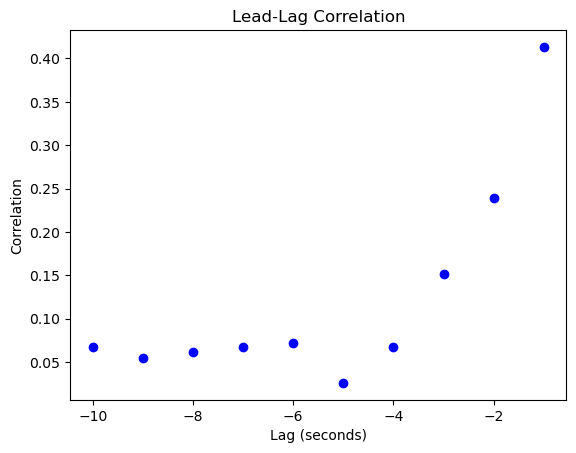

[0.06721842195439011, 0.054171828345351655, 0.06213279981051838, 0.06735630019356129, 0.07143833567771017, 0.02591895901967596, 0.06710154217747455, 0.15146332095882617, 0.23857605034741272, 0.4132881613334384]


In [126]:
total = data.sum(axis=1).pct_change().dropna()
lag, corr = linear_lead_lag(
    t1=total,
    t2=total,
    specific_lags=list(range(-10, 0, 1)))
print(corr)

0


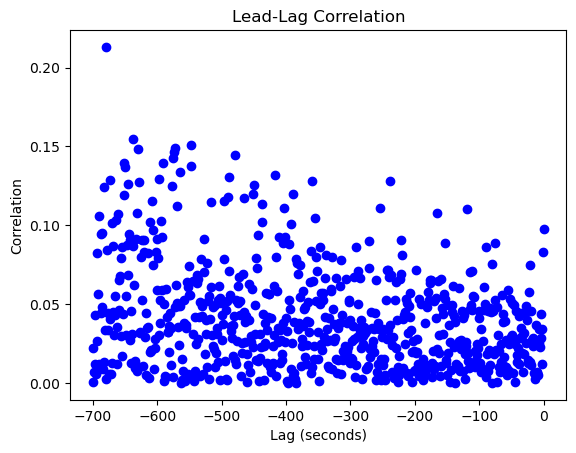

1


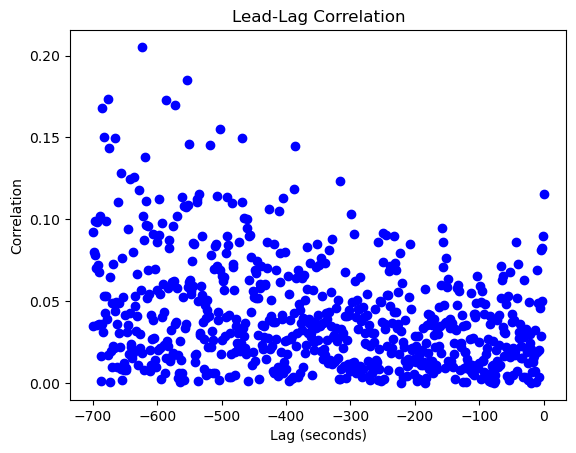

2


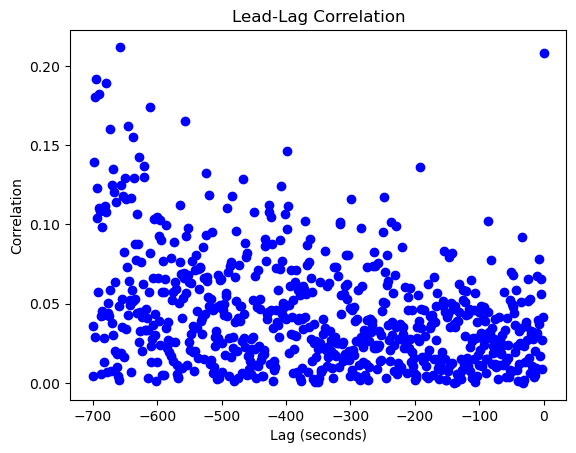

3


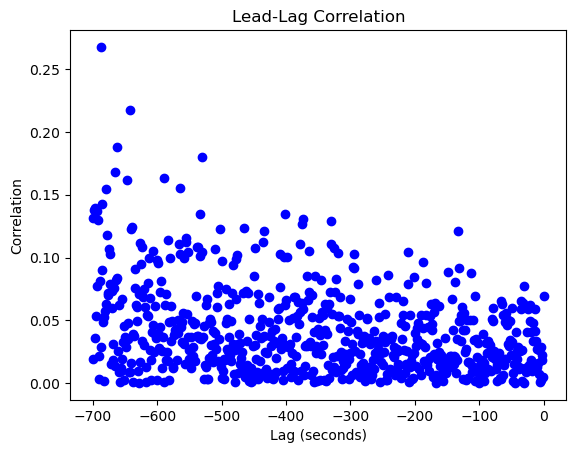

4


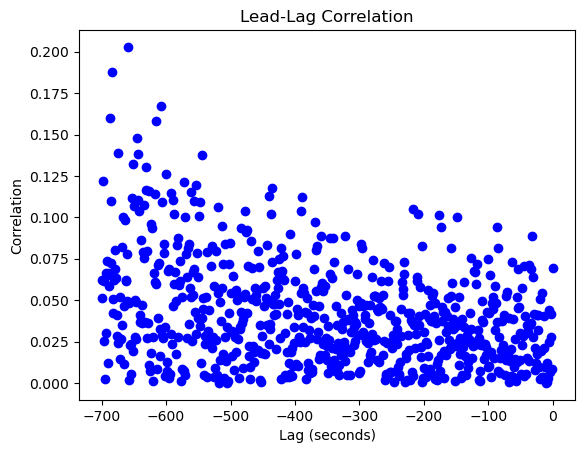

5


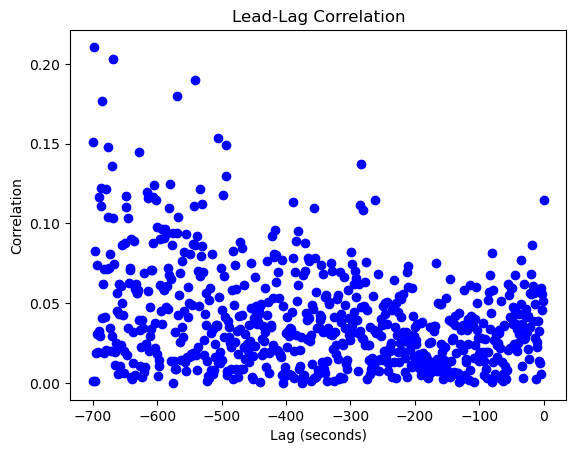

6


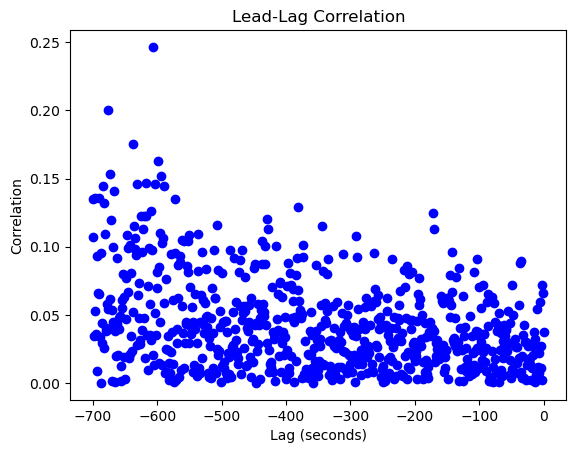

7


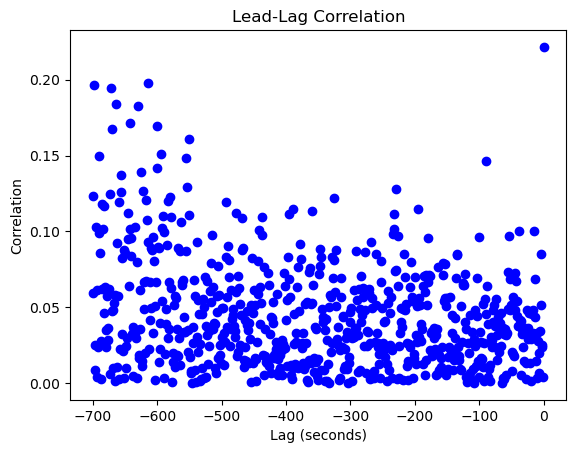

8


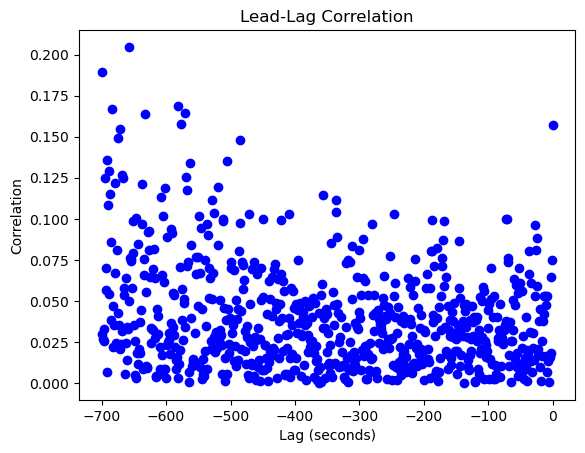

9


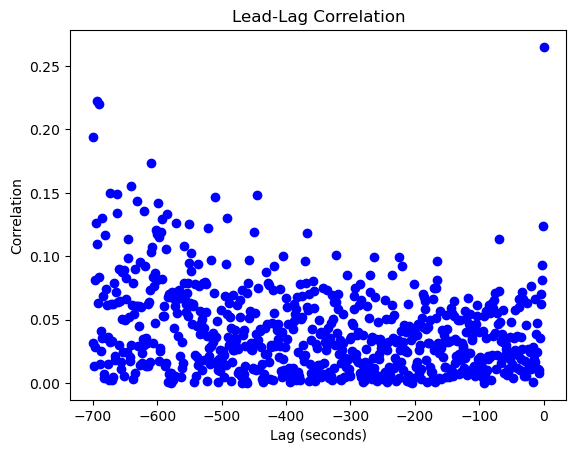

10


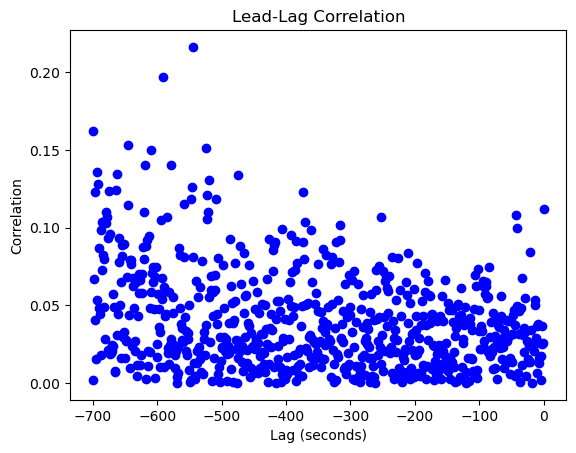

11


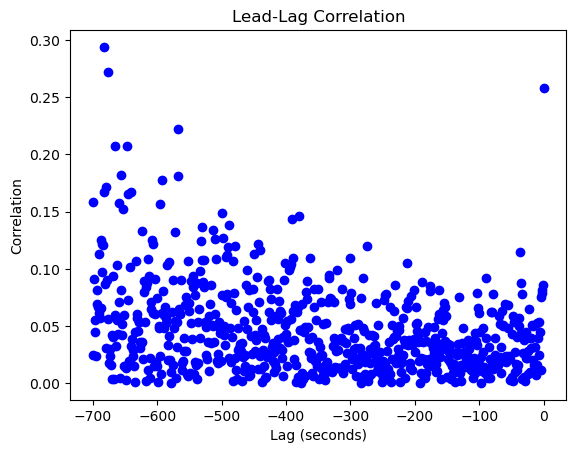

12


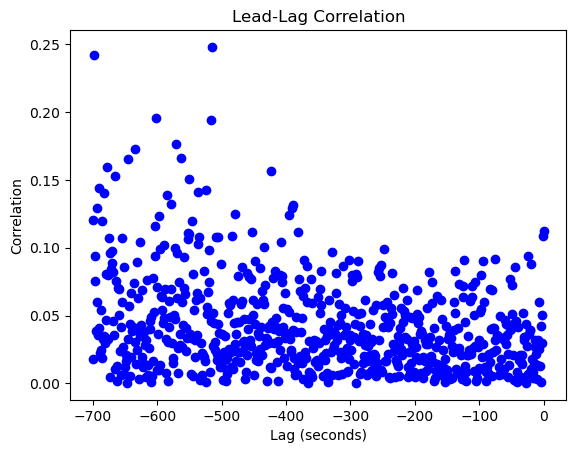

13


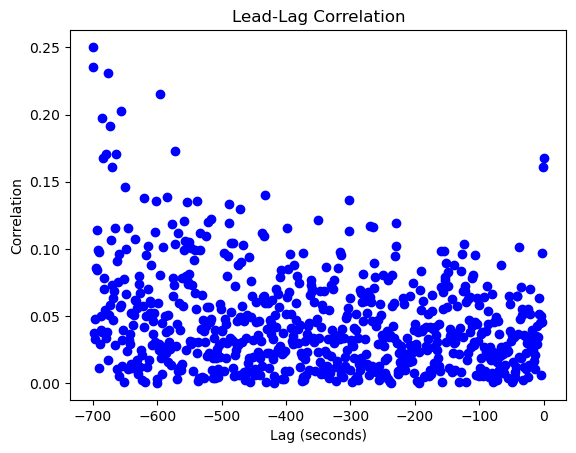

14


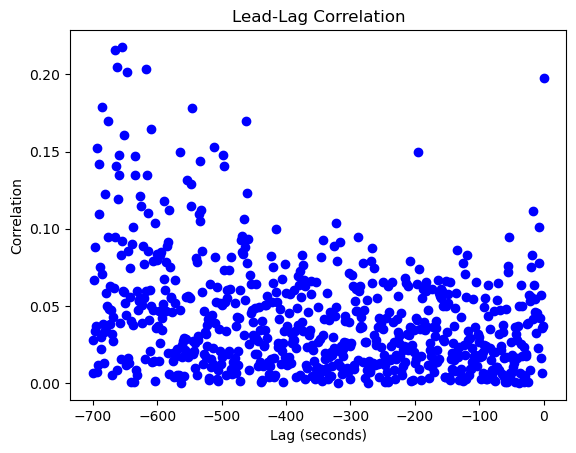

15


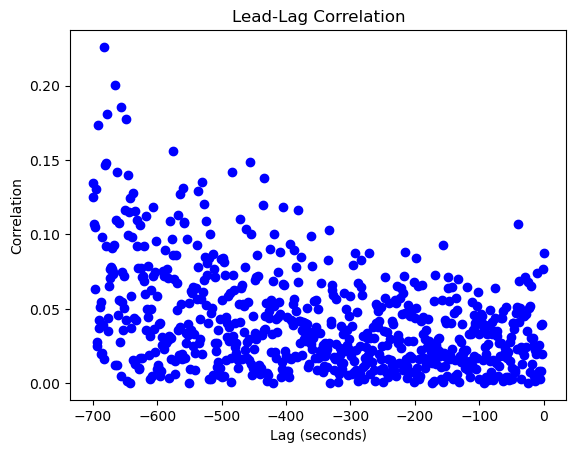

16


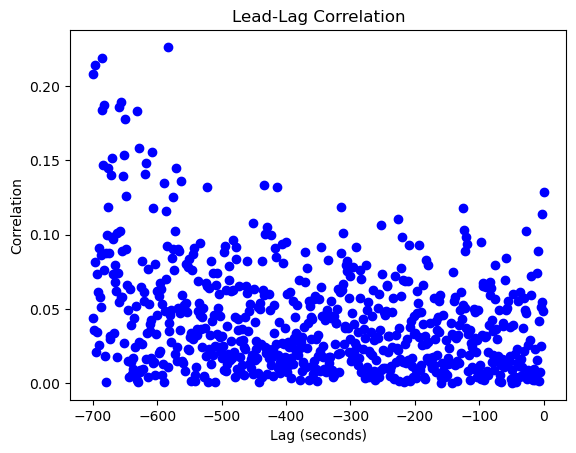

17


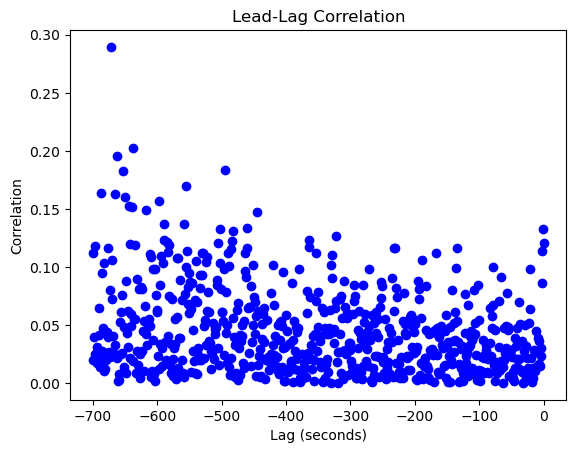

18


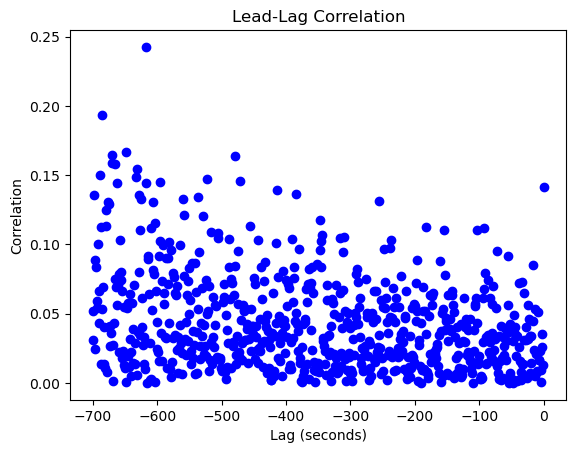

19


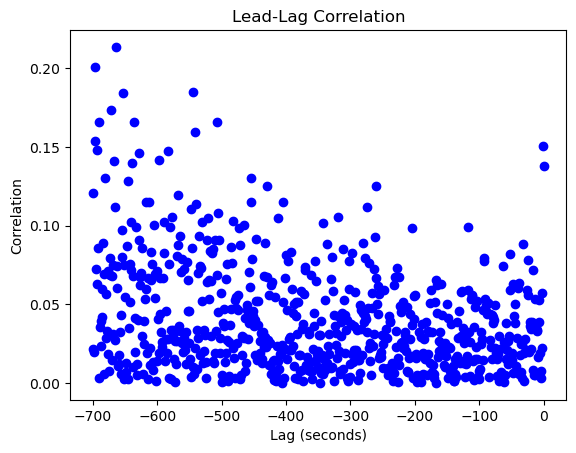

20


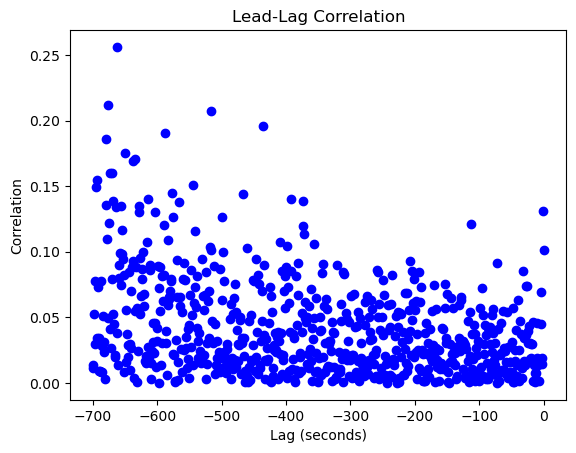

21


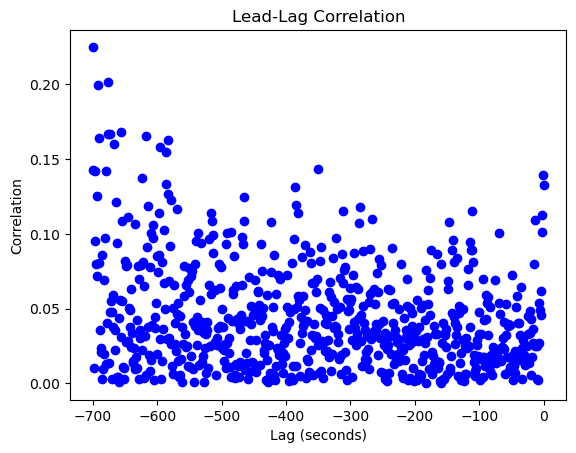

22


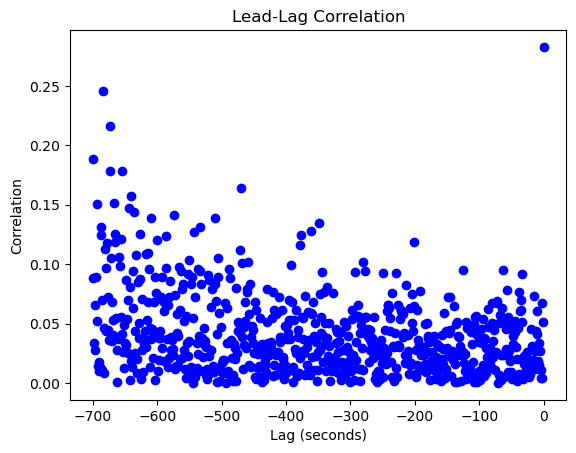

23


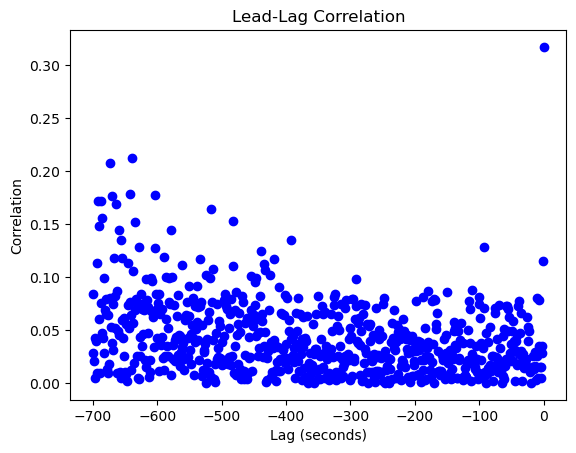

24


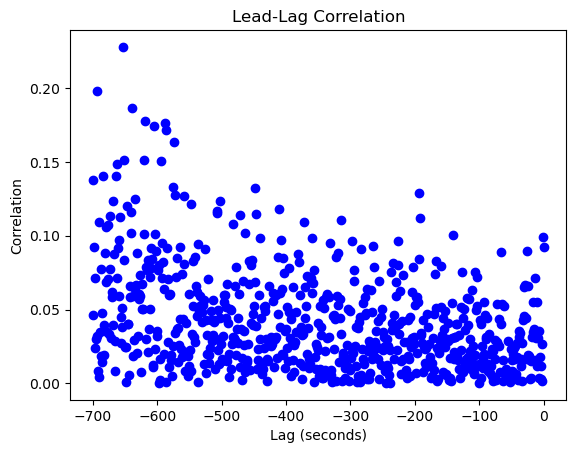

25


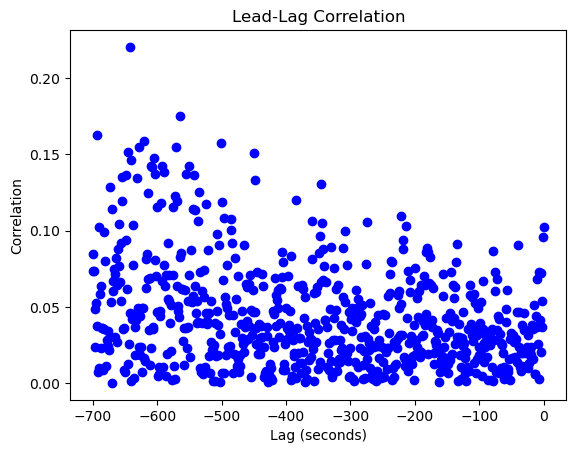

26


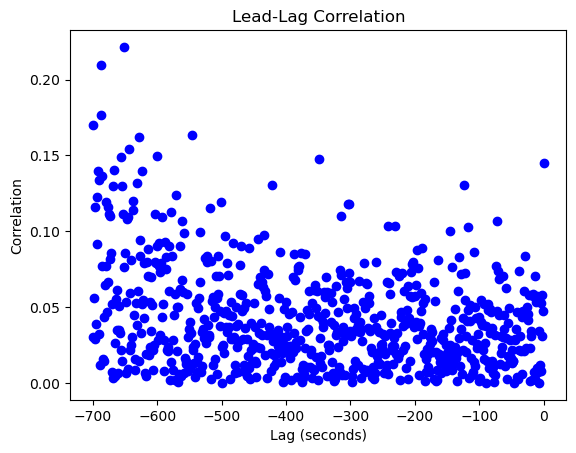

27


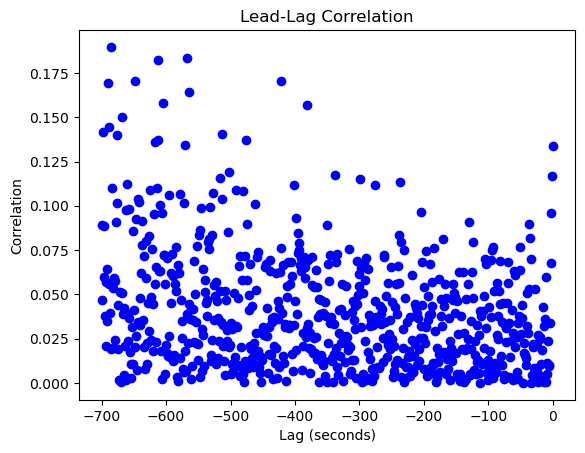

28


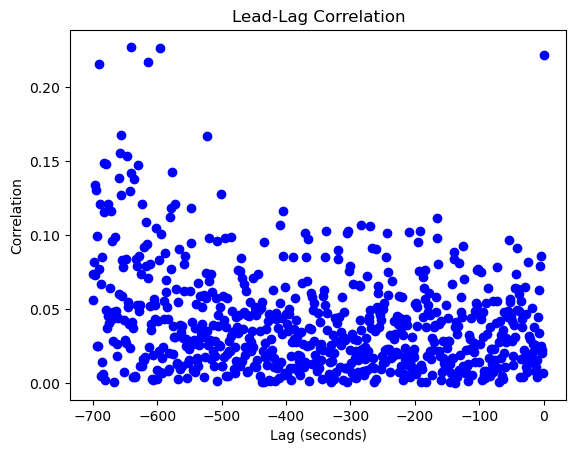

29


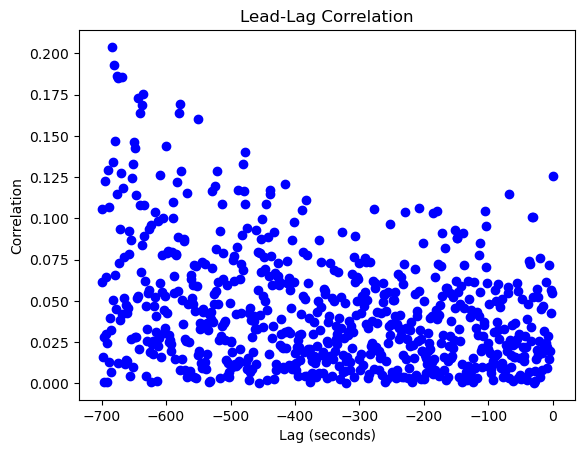

30


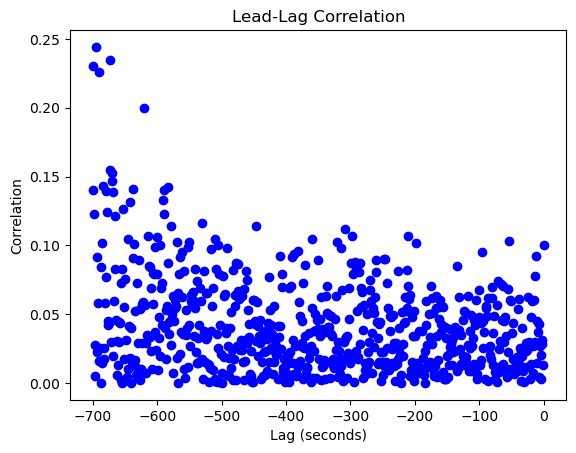

31


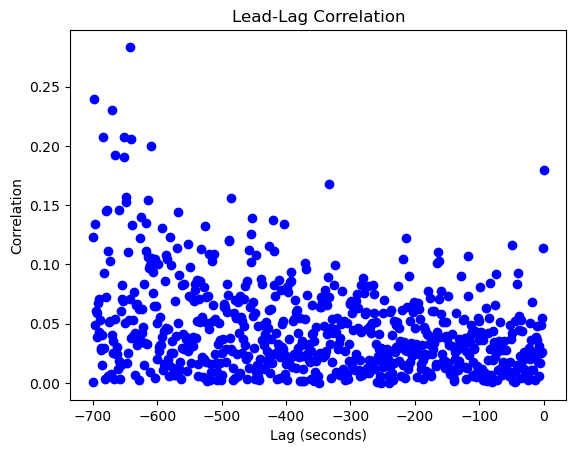

32


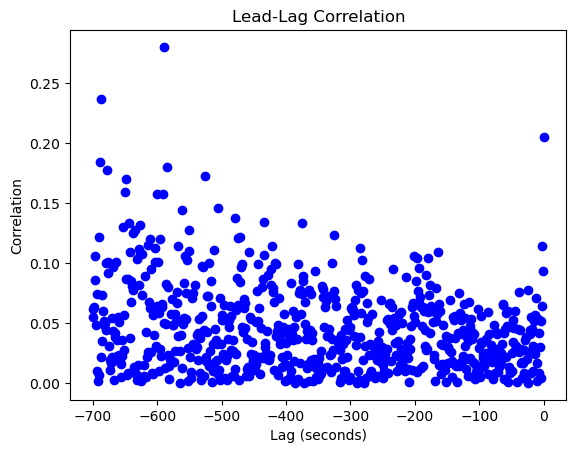

33


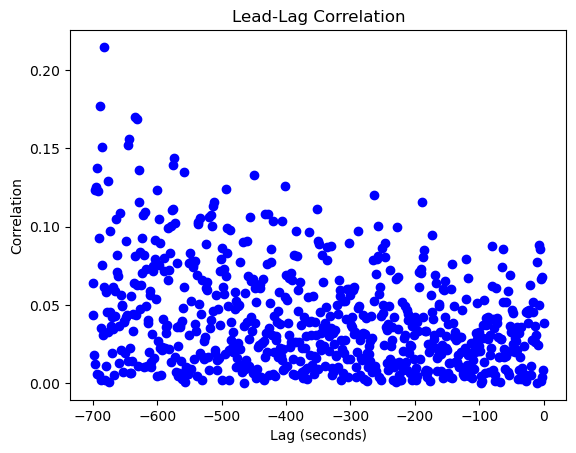

34


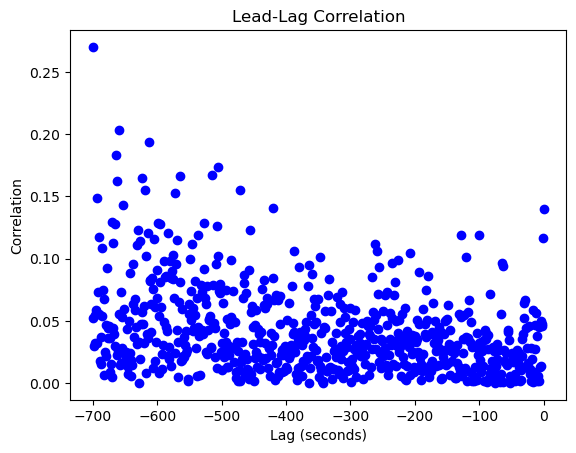

35


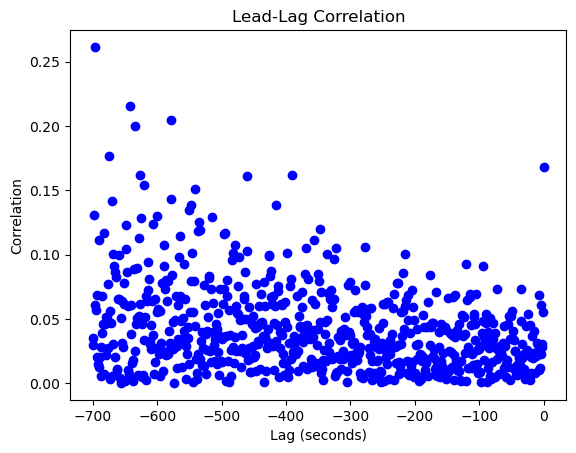

36


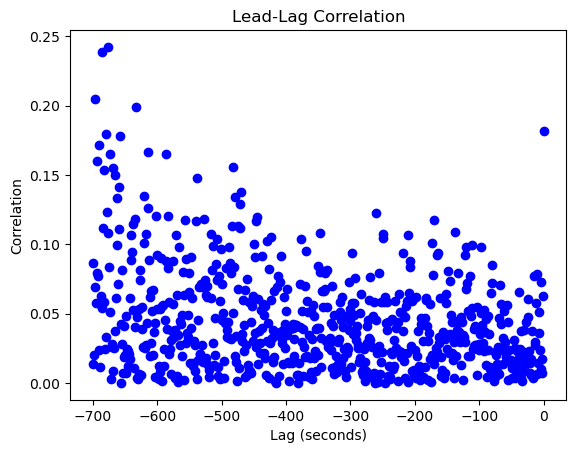

37


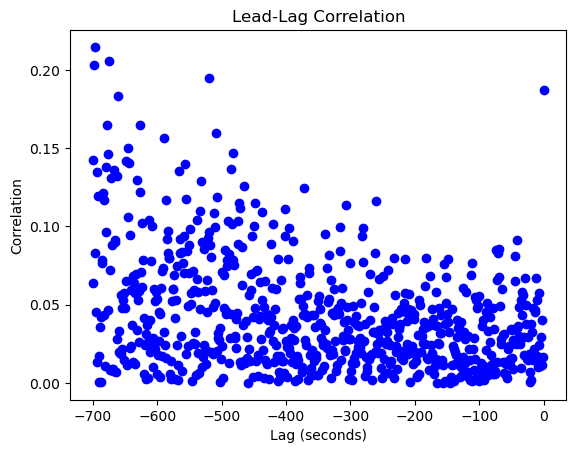

38


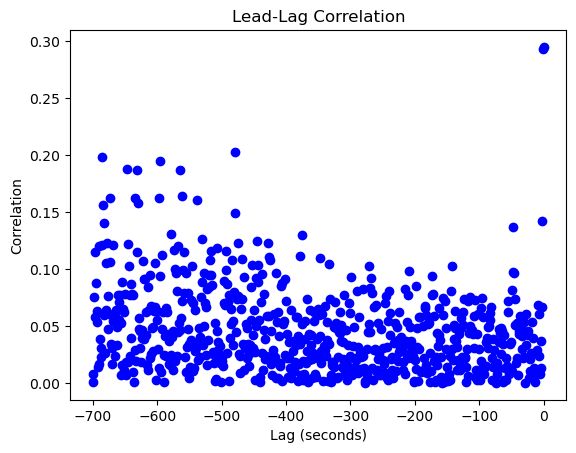

39


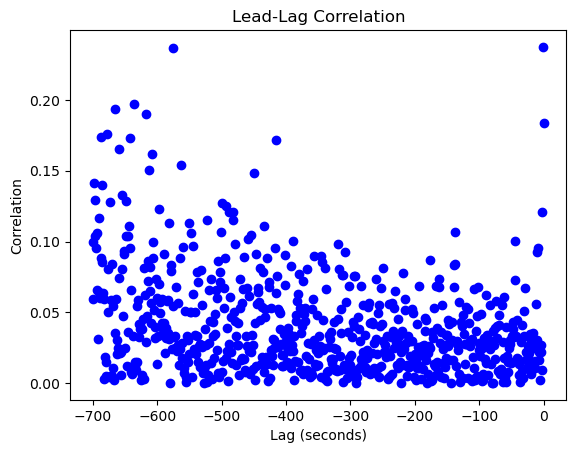

40


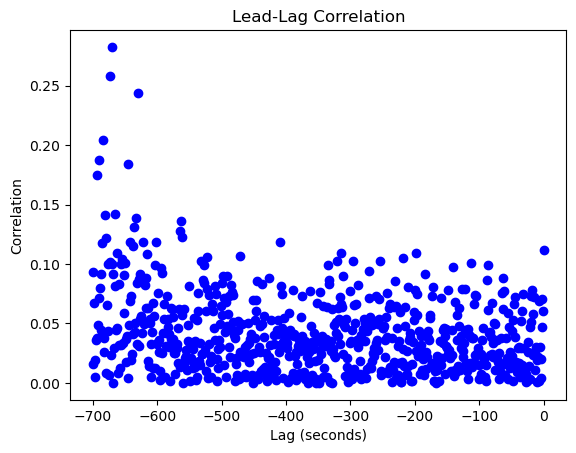

41


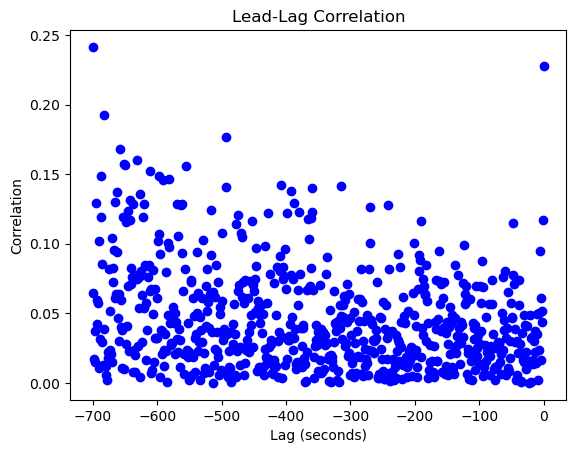

42


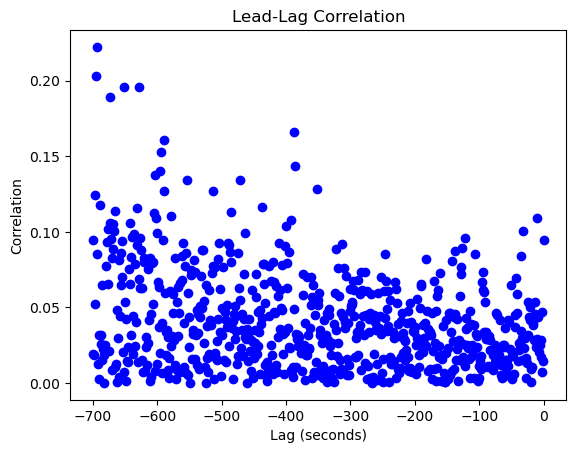

43


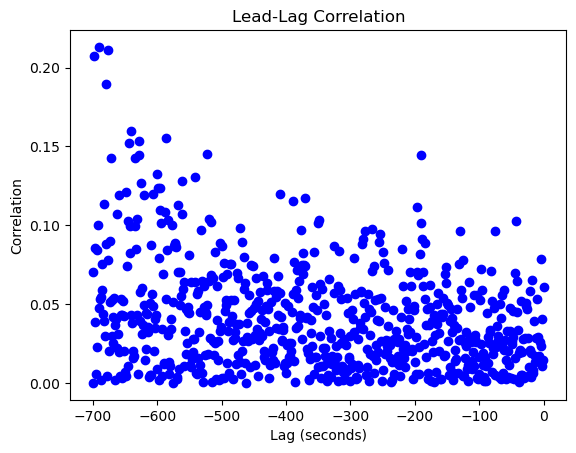

44


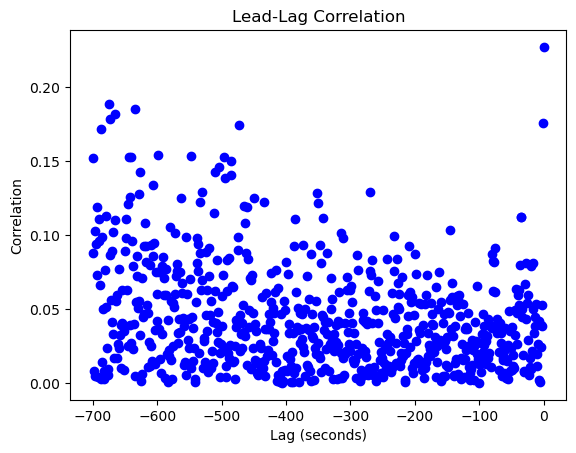

45


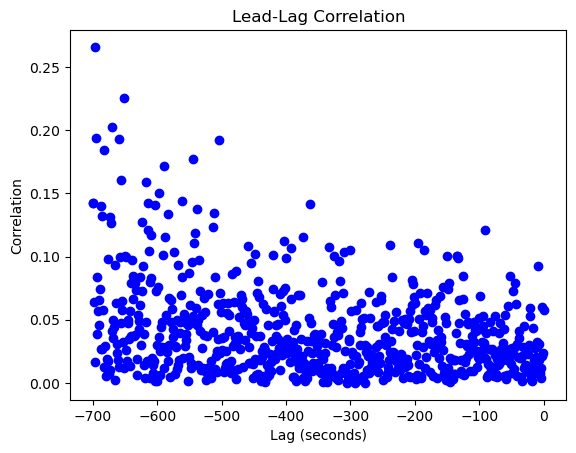

46


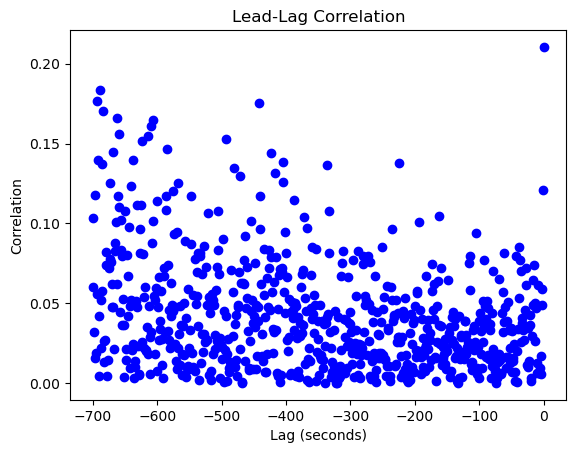

47


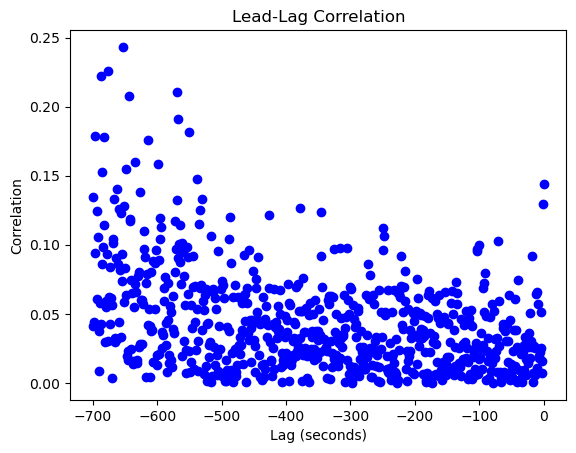

48


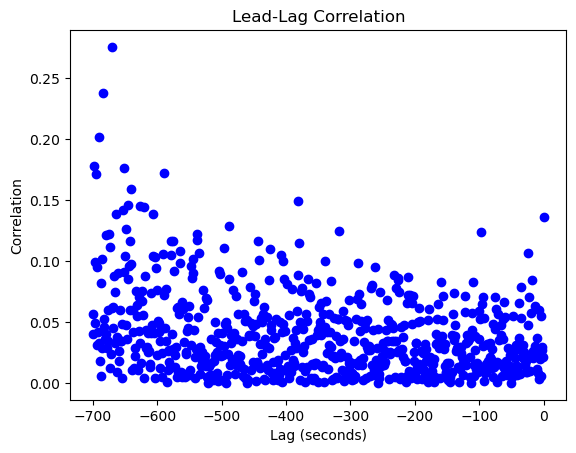

49


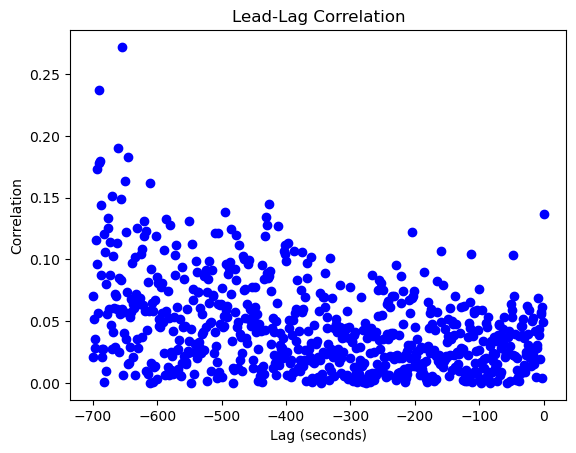

In [127]:
total = data.sum(axis=1).pct_change().dropna()
diction = [None] * 50
for i in range(50):
    print(i)
    lag, corr = linear_lead_lag(
        t1=data[i].pct_change().dropna(),
        t2=total,
        specific_lags=list(range(-700, 1, 1)))
    diction[i] = (lag, corr)
    


In [134]:
strong_cur_corr = []
for i in range(len(diction)):
    lag, corr = diction[i]
    if corr[lag.index(0)] > 0.25:
        print(i, corr[lag.index(0)])
        strong_cur_corr.append(i)

9 0.2650603772347021
11 0.25786300375505883
22 0.2827257702390091
23 0.3175358545706431
38 0.2949375383667074


In [129]:
strong_cur_corr

[22, 23, 38]

In [130]:
for i in range(len(diction)):
    lag, corr = diction[i]
    print(i, max(corr), lag[corr.index(max(corr))])

0 0.21306245229917653 -679
1 0.20526620229159542 -623
2 0.2119542498534158 -658
3 0.26771817501835726 -687
4 0.20288060366298746 -659
5 0.21066793330923614 -698
6 0.2465941194737952 -606
7 0.2216016665892211 0
8 0.20461701421695208 -657
9 0.2650603772347021 0
10 0.21642973549609612 -545
11 0.29396947471839957 -682
12 0.24801595145829464 -515
13 0.25043011473502724 -699
14 0.21780776577905056 -654
15 0.22613227591498863 -682
16 0.22614290307372917 -583
17 0.2895385232213218 -672
18 0.24252039776493767 -618
19 0.21343169500218234 -664
20 0.2561843715311712 -663
21 0.22505070009746952 -699
22 0.2827257702390091 0
23 0.3175358545706431 0
24 0.228018457869993 -653
25 0.22049390589317272 -642
26 0.22149089649586948 -652
27 0.18967979662601253 -685
28 0.22743822332078492 -641
29 0.20395620244897325 -684
30 0.24418868058618615 -695
31 0.2834327548358283 -643
32 0.2804028129969736 -590
33 0.2146737654491217 -682
34 0.2703093021842085 -700
35 0.2615099909940471 -697
36 0.24240386777861878 -676
3

-0.0691280277303391


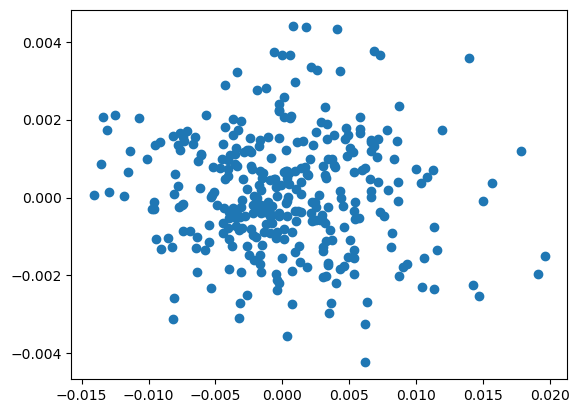

In [138]:
total = real_data.sum(axis=1).pct_change().dropna()
stock = real_data[48].pct_change().dropna().shift(-670).dropna()
print(np.corrcoef(stock, total.iloc[:len(stock)])[0, 1])
plt.plot(stock, total.iloc[:len(stock)], 'o')